<a href="https://colab.research.google.com/github/Polyakri/projects/blob/main/MachineLearningProjects/Ensemble_Methods/Ensemble_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Required Libraries

In [221]:
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error, r2_score

#Importing the data

Downloading the dataset from the
https://www.cryptodatadownload.com/cdd/Gemini_BTCEUR_d.csv

In [276]:
dataset_url = 'https://www.cryptodatadownload.com/cdd/Gemini_BTCEUR_d.csv'
destination_file = 'Gemini_BTCEUR_d.csv'

response = requests.get(dataset_url)

if response.status_code == 200:
    with open(destination_file, 'wb') as file:
        file.write(response.content)
    print(f'Dataset downloaded successfully to {destination_file}')
else:
    print(f'Failed to download dataset. Status code: {response.status_code}')


"dataset_url = 'https://www.cryptodatadownload.com/cdd/Gemini_BTCEUR_d.csv'\ndestination_file = 'Gemini_BTCEUR_d.csv'\n\nresponse = requests.get(dataset_url)\n\nif response.status_code == 200:\n    with open(destination_file, 'wb') as file:\n        file.write(response.content)\n    print(f'Dataset downloaded successfully to {destination_file}')\nelse:\n    print(f'Failed to download dataset. Status code: {response.status_code}')"

Reading the csv

In [223]:
csv_file_path = 'Gemini_BTCEUR_d.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
# Display the DataFrame
df


,,,,,,,,https://www.CryptoDataDownload.com
unix,date,symbol,open,high,low,close,Volume BTC,Volume EUR
1704844800000,2024-01-10 00:00:00,BTC/EUR,41956.8,43490.0,40692.97,42849.17,4.41928021,189362.4889959257
1704758400000,2024-01-09 00:00:00,BTC/EUR,43056.68,45000.0,41001.0,41956.8,1.57604106,66125.63954620801
1704672000000,2024-01-08 00:00:00,BTC/EUR,40134.24,43078.66,39531.07,43056.68,1.91408517,82414.1526574356
1704585600000,2024-01-07 00:00:00,BTC/EUR,40079.99,40994.99,39771.03,40134.24,0.73589235,29534.480189063997
...,...,...,...,...,...,...,...,...
1603857600000,2020-10-28 04:00:00,BTC/EUR,0.0,11441.37,0.0,11153.76,0.47127255,5256.460917288
1603771200000,2020-10-27 04:00:00,BTC/EUR,0.0,0.0,0.0,0.0,0.0,0.0
1603684800000,2020-10-26 04:00:00,BTC/EUR,0.0,0.0,0.0,0.0,0.0,0.0
1603598400000,2020-10-25 04:00:00,BTC/EUR,0.0,0.0,0.0,0.0,0.0,0.0


The first line of the file is considered as column names so it is causing trouble. Let's re-read it but skipping the first line this time.

Reading the file, this time without the first line

In [224]:
csv_file_path = 'Gemini_BTCEUR_d.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, skiprows=[0])
# Display the DataFrame
df


,unix,date,symbol,open,high,low,close,Volume BTC,Volume EUR
0,1704844800000,2024-01-10 00:00:00,BTC/EUR,41956.80,43490.00,40692.97,42849.17,4.419280,189362.488996
1,1704758400000,2024-01-09 00:00:00,BTC/EUR,43056.68,45000.00,41001.00,41956.80,1.576041,66125.639546
2,1704672000000,2024-01-08 00:00:00,BTC/EUR,40134.24,43078.66,39531.07,43056.68,1.914085,82414.152657
3,1704585600000,2024-01-07 00:00:00,BTC/EUR,40079.99,40994.99,39771.03,40134.24,0.735892,29534.480189
4,1704499200000,2024-01-06 00:00:00,BTC/EUR,40356.27,40434.14,39927.79,40079.99,0.113951,4567.157746
...,...,...,...,...,...,...,...,...,...
1523,1603857600000,2020-10-28 04:00:00,BTC/EUR,0.00,11441.37,0.00,11153.76,0.471273,5256.460917
1524,1603771200000,2020-10-27 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000
1525,1603684800000,2020-10-26 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000
1526,1603598400000,2020-10-25 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000


#Data Visualisation


In [225]:
df['datetime'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'datetime' column
df.sort_values(by='datetime', inplace=True)

# Check for missing values
missing_values = df.isnull().any()

# Check for gaps in the dates
date_diff = df['datetime'].diff()
missing_gaps = date_diff[date_diff > pd.Timedelta(days=1)]

# Display results
print("Missing Values:")
print(missing_values)
print("\nMissing Date Gaps:")
print(missing_gaps)

Missing Values:
unix          False
date          False
symbol        False
open          False
high          False
low           False
close         False
Volume BTC    False
Volume EUR    False
datetime      False
dtype: bool

Missing Date Gaps:
Series([], Name: datetime, dtype: timedelta64[ns])


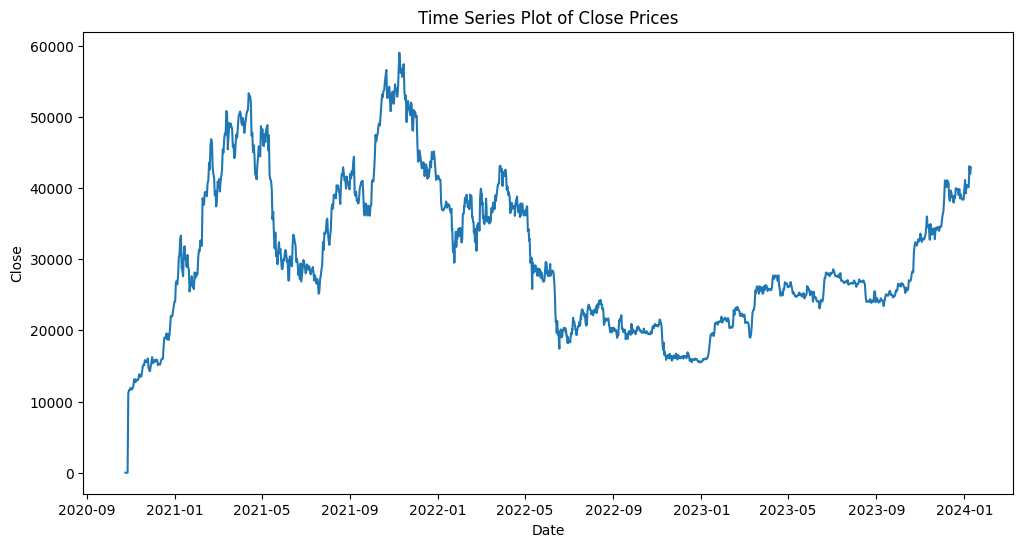

In [226]:
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices')
plt.show()

Stationarity refers to a property of a time series where its statistical characteristics, such as mean, variance, and autocorrelation, remain constant over time.

Trend represents a long-term and generally systematic upward or downward movement in the data over time. It reflects the underlying direction or pattern in the series

Seasonality in time series analysis refers to recurring and predictable patterns or fluctuations in data that follow a regular and consistent timeframe. These patterns often repeat at fixed intervals, such as daily, weekly, monthly, or annually, corresponding to certain seasons, months, or specific events.

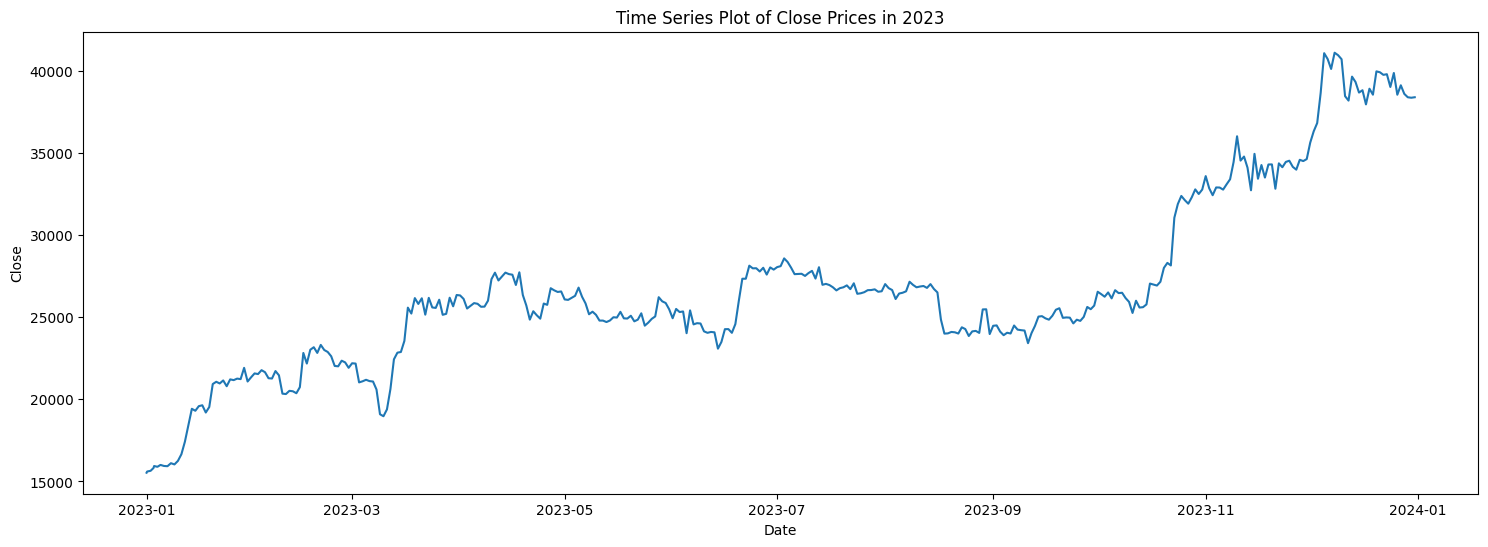

In [227]:
df_2023 = df[df['date'].dt.year == 2023]

# Plotting
plt.figure(figsize=(18, 6))
plt.plot(df_2023['date'], df_2023['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices in 2023')
plt.show()


In the 2023 close we can see that therre is an upward trend. This is the only visual observation we can make. There is not stationarity in this timeseries. The seasonability cannot be determined.

#Data Pre-processing

Splitting the date into year, month, day, hour, minute,second

In [228]:
df[['date', 'time']] = df['date'].astype(str).str.split(' ', expand=True)
df[['year', 'month', 'day']] = df['date'].str.split('-', expand=True)
df[['hour', 'minute', 'second']] = df['time'].str.rsplit(':', n=2, expand=True)
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume EUR,datetime,time,year,month,day,hour,minute,second
1527,1603512000000,2020-10-24,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000,2020-10-24 04:00:00,04:00:00,2020,10,24,04,00,00
1526,1603598400000,2020-10-25,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000,2020-10-25 04:00:00,04:00:00,2020,10,25,04,00,00
1525,1603684800000,2020-10-26,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000,2020-10-26 04:00:00,04:00:00,2020,10,26,04,00,00
1524,1603771200000,2020-10-27,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000,2020-10-27 04:00:00,04:00:00,2020,10,27,04,00,00
1523,1603857600000,2020-10-28,BTC/EUR,0.00,11441.37,0.00,11153.76,0.471273,5256.460917,2020-10-28 04:00:00,04:00:00,2020,10,28,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1704499200000,2024-01-06,BTC/EUR,40356.27,40434.14,39927.79,40079.99,0.113951,4567.157746,2024-01-06 00:00:00,00:00:00,2024,01,06,00,00,00
3,1704585600000,2024-01-07,BTC/EUR,40079.99,40994.99,39771.03,40134.24,0.735892,29534.480189,2024-01-07 00:00:00,00:00:00,2024,01,07,00,00,00
2,1704672000000,2024-01-08,BTC/EUR,40134.24,43078.66,39531.07,43056.68,1.914085,82414.152657,2024-01-08 00:00:00,00:00:00,2024,01,08,00,00,00
1,1704758400000,2024-01-09,BTC/EUR,43056.68,45000.00,41001.00,41956.80,1.576041,66125.639546,2024-01-09 00:00:00,00:00:00,2024,01,09,00,00,00


Check the different values of the symbol, time, hour, minute and second and see if we can drop some of them


In [229]:
count_zero_close = (df['close'] == 0).sum()

print(f"The number of close values equal to 0 is: {count_zero_close}")


The number of close values equal to 0 is: 4


These rows are wrong and might influence the model. I will drop them

In [230]:
df = df[df['close'] != 0]
df = df[df['open'] != 0]
df = df[df['high'] != 0]
df = df[df['low'] != 0]

In [231]:
columns_to_inspect = ['symbol', 'time', 'hour', 'minute', 'second']


for column in columns_to_inspect:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for symbol: ['BTC/EUR']
Unique values for time: ['04:00:00' '11:00:00' '00:00:00']
Unique values for hour: ['04' '11' '00']
Unique values for minute: ['00']
Unique values for second: ['00']


We can see that the "snapshots" are from BTC/EURO only and they are taken at three specific times 00, 04 and 11. So we can drop the symbol, date, time (since the information is stored into year, month, day and hour columns), minute and seconds since they are 0.

In [232]:
columns_to_drop = ['minute', 'second', 'time', 'symbol', 'date', 'hour', 'datetime']


df.drop(columns=columns_to_drop, inplace=True)

Drop Unix, Volume EUR as well

In [233]:
columns_to_drop = ['unix', 'Volume EUR']


df.drop(columns=columns_to_drop, inplace=True)
df

,open,high,low,close,Volume BTC,year,month,day
1522,11153.76,11615.51,11153.76,11605.42,0.858235,2020,10,29
1521,11605.42,11702.12,11310.25,11602.24,3.009381,2020,10,30
1520,11602.24,12008.24,11602.24,11902.44,5.232720,2020,10,31
1519,11902.44,11902.44,11794.98,11794.98,0.856294,2020,11,01
1518,11794.98,11794.98,11403.28,11669.75,3.556633,2020,11,02
...,...,...,...,...,...,...,...,...
4,40356.27,40434.14,39927.79,40079.99,0.113951,2024,01,06
3,40079.99,40994.99,39771.03,40134.24,0.735892,2024,01,07
2,40134.24,43078.66,39531.07,43056.68,1.914085,2024,01,08
1,43056.68,45000.00,41001.00,41956.80,1.576041,2024,01,09


#Data Normalization

The best normalization method for financial data is log returns because we care more about changes rather than absolute values. Defining the logarithmic returns can help us effectively manage fluctuations.

Create the next day column and remove the nan values

In [234]:
df['close_NextDay'] = df['close'].shift(-1)
df['high_NextDay'] = df['high'].shift(-1)
df['open_NextDay'] = df['open'].shift(-1)
df['low_NextDay'] = df['low'].shift(-1)
df['vol_NextDay'] = df['Volume BTC'].shift(-1)
df.sort_index(inplace=True)
df

,open,high,low,close,Volume BTC,year,month,day,close_NextDay,high_NextDay,open_NextDay,low_NextDay,vol_NextDay
0,41956.80,43490.00,40692.97,42849.17,4.419280,2024,01,10,NaN,NaN,NaN,NaN,NaN
1,43056.68,45000.00,41001.00,41956.80,1.576041,2024,01,09,42849.17,43490.00,41956.80,40692.97,4.419280
2,40134.24,43078.66,39531.07,43056.68,1.914085,2024,01,08,41956.80,45000.00,43056.68,41001.00,1.576041
3,40079.99,40994.99,39771.03,40134.24,0.735892,2024,01,07,43056.68,43078.66,40134.24,39531.07,1.914085
4,40356.27,40434.14,39927.79,40079.99,0.113951,2024,01,06,40134.24,40994.99,40079.99,39771.03,0.735892
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,11794.98,11794.98,11403.28,11669.75,3.556633,2020,11,02,11887.51,11893.80,11669.75,11567.38,1.109315
1519,11902.44,11902.44,11794.98,11794.98,0.856294,2020,11,01,11669.75,11794.98,11794.98,11403.28,3.556633
1520,11602.24,12008.24,11602.24,11902.44,5.232720,2020,10,31,11794.98,11902.44,11902.44,11794.98,0.856294
1521,11605.42,11702.12,11310.25,11602.24,3.009381,2020,10,30,11902.44,12008.24,11602.24,11602.24,5.232720


Log return the data

In [235]:
epsilon = 0.001
mask = df['close_NextDay'].notna()

df.loc[mask, 'close'] = np.log((df['close_NextDay'] + epsilon) / (df['close'] + epsilon))
df.loc[mask, 'high'] = np.log((df['high_NextDay'] + epsilon) / (df['high'] + epsilon))
df.loc[mask, 'open'] = np.log((df['open_NextDay'] + epsilon) / (df['open'] + epsilon))
df.loc[mask, 'low'] = np.log((df['low_NextDay'] + epsilon) / (df['low'] + epsilon))
df.loc[mask, 'Volume BTC'] = np.log((df['vol_NextDay'] + epsilon) / (df['Volume BTC'] + epsilon))

df['close_NextDay'] = df['close'].shift(1)

df


,open,high,low,close,Volume BTC,year,month,day,close_NextDay,high_NextDay,open_NextDay,low_NextDay,vol_NextDay
0,41956.800000,43490.000000,40692.970000,42849.170000,4.419280,2024,01,10,NaN,NaN,NaN,NaN,NaN
1,-0.025877,-0.034131,-0.007541,0.021046,1.030653,2024,01,09,42849.170000,43490.00,41956.80,40692.97,4.419280
2,0.070288,0.043635,0.036510,-0.025877,-0.194212,2024,01,08,0.021046,45000.00,43056.68,41001.00,1.576041
3,0.001353,0.049578,-0.006052,0.070288,0.955076,2024,01,07,-0.025877,43078.66,40134.24,39531.07,1.914085
4,-0.006870,0.013775,-0.003934,0.001353,1.857935,2024,01,06,0.070288,40994.99,40079.99,39771.03,0.735892
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,-0.010674,0.008343,0.014288,0.018488,-1.164452,2020,11,02,0.025357,11893.80,11669.75,11567.38,1.109315
1519,-0.009069,-0.009069,-0.033773,-0.010674,1.423070,2020,11,01,0.018488,11794.98,11794.98,11403.28,3.556633
1520,0.025545,-0.008850,0.016476,-0.009069,-1.809097,2020,10,31,-0.010674,11902.44,11902.44,11794.98,0.856294
1521,-0.000274,0.025823,0.025489,0.025545,0.553056,2020,10,30,-0.009069,12008.24,11602.24,11602.24,5.232720


Unfortunately I had some values equal to 0 so I had to find a way to get rid of infinities.

In [236]:
inf_rows = df[df.applymap(lambda x: np.isinf(x) if isinstance(x, (int, float)) else False).any(axis=1)]

# Find columns with infinite values
inf_cols = df.columns[df.applymap(lambda x: np.isinf(x) if isinstance(x, (int, float)) else False).any()]

print("Rows with infinite values:")
print(inf_rows)

print("\nColumns with infinite values:")
print(inf_cols)

Rows with infinite values:
Empty DataFrame
Columns: [open, high, low, close, Volume BTC, year, month, day, close_NextDay, high_NextDay, open_NextDay, low_NextDay, vol_NextDay]
Index: []

Columns with infinite values:
Index([], dtype='object')


Drop the first two rows cause they are not normalized and have missing values

In [237]:
df = df.drop([0, 1], axis=0)
df = df.reset_index ()

In [238]:
df

,index,open,high,low,close,Volume BTC,year,month,day,close_NextDay,high_NextDay,open_NextDay,low_NextDay,vol_NextDay
0,2,0.070288,0.043635,0.036510,-0.025877,-0.194212,2024,01,08,0.021046,45000.00,43056.68,41001.00,1.576041
1,3,0.001353,0.049578,-0.006052,0.070288,0.955076,2024,01,07,-0.025877,43078.66,40134.24,39531.07,1.914085
2,4,-0.006870,0.013775,-0.003934,0.001353,1.857935,2024,01,06,0.070288,40994.99,40079.99,39771.03,0.735892
3,5,-0.001326,-0.002952,0.026078,-0.006870,-3.350678,2024,01,05,0.001353,40434.14,40356.27,39927.79,0.113951
4,6,0.029606,-0.003660,-0.006130,-0.001326,0.489264,2024,01,04,-0.006870,40553.68,40409.83,38900.00,3.277643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1518,-0.010674,0.008343,0.014288,0.018488,-1.164452,2020,11,02,0.025357,11893.80,11669.75,11567.38,1.109315
1517,1519,-0.009069,-0.009069,-0.033773,-0.010674,1.423070,2020,11,01,0.018488,11794.98,11794.98,11403.28,3.556633
1518,1520,0.025545,-0.008850,0.016476,-0.009069,-1.809097,2020,10,31,-0.010674,11902.44,11902.44,11794.98,0.856294
1519,1521,-0.000274,0.025823,0.025489,0.025545,0.553056,2020,10,30,-0.009069,12008.24,11602.24,11602.24,5.232720


I am getting some errors while trying to keep only 2023 so let me check the value of every column

In [239]:
for column in df.columns:
    print(f"Column '{column}' has data type: {df[column].dtype}")


Column 'index' has data type: int64
Column 'open' has data type: float64
Column 'high' has data type: float64
Column 'low' has data type: float64
Column 'close' has data type: float64
Column 'Volume BTC' has data type: float64
Column 'year' has data type: object
Column 'month' has data type: object
Column 'day' has data type: object
Column 'close_NextDay' has data type: float64
Column 'high_NextDay' has data type: float64
Column 'open_NextDay' has data type: float64
Column 'low_NextDay' has data type: float64
Column 'vol_NextDay' has data type: float64


Make year into int

In [240]:
df['year'] = df['year'].astype(int)
df = df[df['year'] != 2024]
df =df.reset_index()
columns_to_drop = ['index', 'level_0']


df.drop(columns=columns_to_drop, inplace=True)

df.head (15)

,open,high,low,close,Volume BTC,year,month,day,close_NextDay,high_NextDay,open_NextDay,low_NextDay,vol_NextDay
0,0.000799,0.003728,0.002130,0.041468,1.321150,2023,12,31,0.027339,40000.00,38375.20,38375.20,1.026495
1,-0.000765,0.030789,0.012994,0.000799,-1.543102,2023,12,30,0.041468,39851.15,38344.54,38293.53,0.273165
2,-0.005370,-0.030768,-0.003402,-0.000765,-0.533261,2023,12,29,0.000799,38642.87,38373.87,37799.18,1.281840
3,-0.013427,0.010478,-0.009715,-0.005370,0.231323,2023,12,28,-0.000765,39850.30,38580.51,37927.98,2.185577
4,0.014780,0.006704,-0.004265,-0.013427,-0.224903,2023,12,27,-0.005370,39434.93,39102.04,38298.25,1.734013
5,-0.033756,-0.017203,0.011981,0.014780,1.631874,2023,12,26,-0.013427,39171.43,38528.36,38461.94,2.171586
6,0.021589,-0.020836,-0.025874,-0.033756,1.092133,2023,12,25,0.014780,39851.14,39851.14,38003.87,0.423877
7,-0.019710,0.000001,0.000000,0.021589,-1.960596,2023,12,24,-0.033756,40690.19,39000.00,39000.00,0.141546
8,0.000995,0.017663,-0.009612,-0.019710,1.699636,2023,12,23,0.021589,40690.14,39776.31,39000.00,1.011586
9,-0.003961,-0.007945,-0.000960,0.000995,-2.230086,2023,12,22,-0.019710,39977.74,39736.76,39376.69,0.184050


Make the target Dataframe and drop the unessecary columns

In [241]:
target_df = df[['close_NextDay']]

selected_columns = ['open', 'high', 'low', 'close', 'Volume BTC', 'year']
input_df = df[selected_columns]

Split the dataset into T, timeframes

In [242]:
import pandas as pd

# Assuming input_df and target_df are your DataFrames

# Transformation for input_df (same as before)
grouped_input_df = input_df.groupby(input_df.index // 7).agg({
    'open': lambda x: list(x),
    'high': lambda x: list(x),
    'low': lambda x: list(x),
    'close': lambda x: list(x),
    'Volume BTC': lambda x: list(x),
    'year': lambda x: x.mode().iloc[0] if x.mode().count() >= 3 else x.iloc[0]
})

for col in ['open', 'high', 'low', 'close', 'Volume BTC']:
    for i in range(1, 8):
        grouped_input_df[f'{col}{i}'] = grouped_input_df[col].apply(lambda x: x[i-1] if len(x) >= i else None)

grouped_input_df.drop(columns=['open', 'high', 'low', 'close', 'Volume BTC'], inplace=True)
grouped_input_df.reset_index(drop=True, inplace=True)


# Transformation for target_df
grouped_target_df = target_df.groupby(target_df.index // 7).agg({
    'close_NextDay': lambda x: list(x)
})

for i in range(1, 8):
    grouped_target_df[f'close_NextDay{i}'] = grouped_target_df['close_NextDay'].apply(lambda x: x[i-1] if len(x) >= i else None)

grouped_target_df.drop(columns=['close_NextDay'], inplace=True)
grouped_target_df.reset_index(drop=True, inplace=True)


In [243]:
grouped_input_df

,year,open1,open2,open3,open4,open5,open6,open7,high1,high2,...,close5,close6,close7,Volume BTC1,Volume BTC2,Volume BTC3,Volume BTC4,Volume BTC5,Volume BTC6,Volume BTC7
0,2023,0.000799,-0.000765,-0.005370,-0.013427,0.014780,-0.033756,0.021589,0.003728,0.030789,...,-0.013427,0.014780,-0.033756,1.321150,-1.543102,-0.533261,0.231323,-0.224903,1.631874,1.092133
1,2023,-0.019710,0.000995,-0.003961,-0.001370,0.036145,-0.009376,0.024838,0.000001,0.017663,...,-0.001370,0.036145,-0.009376,-1.960596,1.699636,-2.230086,-0.319591,-0.408388,1.996525,-0.960238
2,2023,-0.022440,0.003670,-0.016516,-0.008256,0.037465,-0.007045,-0.056792,-0.054854,0.050028,...,-0.008256,0.037465,-0.007045,-0.782643,0.972201,1.306777,-2.495576,0.255785,-0.005976,0.011779
3,2023,-0.005984,-0.003704,0.024323,-0.014950,-0.008682,0.060590,0.048666,0.024406,-0.028244,...,-0.014950,-0.008682,0.060590,2.435844,-1.251788,-1.647430,-0.266810,1.707233,-2.138475,0.496169
4,2023,0.013811,0.019098,0.028507,0.003527,-0.002250,0.017485,-0.004973,0.059237,0.013262,...,0.003527,-0.002250,0.017485,1.287869,0.162431,-0.507311,0.150681,-0.127163,-0.635365,0.582867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2020,-0.024565,-0.081340,0.027476,0.005997,-0.004478,-0.014021,0.044732,-0.039226,-0.077215,...,0.005997,-0.004478,-0.014021,-1.111628,0.478381,1.067370,-0.900940,-0.518913,1.513970,-1.459413
213,2020,-0.002528,0.015765,0.055661,0.043737,0.003022,-0.021234,-0.004711,0.042204,-0.009424,...,0.043737,0.003022,-0.021234,4.563242,-4.220685,1.233699,0.431735,-1.393916,1.009251,1.900373
214,2020,0.048182,0.015340,-0.006316,-0.003338,0.030613,-0.032896,0.003300,0.000632,0.024475,...,-0.003338,0.030613,-0.032896,4.843902,-7.058639,0.646172,-0.994591,0.328215,-1.496786,1.964088
215,2020,0.070489,0.025357,0.018488,-0.010674,-0.009069,0.025545,-0.000274,-0.014921,0.101291,...,-0.010674,-0.009069,0.025545,-1.144293,0.335429,1.523627,-1.164452,1.423070,-1.809097,0.553056


In [244]:
grouped_target_df = grouped_target_df['close_NextDay7']
grouped_target_df

0      0.014780
1      0.036145
2      0.037465
3     -0.008682
4     -0.002250
         ...   
212   -0.004478
213    0.003022
214    0.030613
215   -0.009069
216         NaN
Name: close_NextDay7, Length: 217, dtype: float64

Check if it is correct

In [245]:
df.head(14)

,open,high,low,close,Volume BTC,year,month,day,close_NextDay,high_NextDay,open_NextDay,low_NextDay,vol_NextDay
0,0.000799,0.003728,0.002130,0.041468,1.321150,2023,12,31,0.027339,40000.00,38375.20,38375.20,1.026495
1,-0.000765,0.030789,0.012994,0.000799,-1.543102,2023,12,30,0.041468,39851.15,38344.54,38293.53,0.273165
2,-0.005370,-0.030768,-0.003402,-0.000765,-0.533261,2023,12,29,0.000799,38642.87,38373.87,37799.18,1.281840
3,-0.013427,0.010478,-0.009715,-0.005370,0.231323,2023,12,28,-0.000765,39850.30,38580.51,37927.98,2.185577
4,0.014780,0.006704,-0.004265,-0.013427,-0.224903,2023,12,27,-0.005370,39434.93,39102.04,38298.25,1.734013
5,-0.033756,-0.017203,0.011981,0.014780,1.631874,2023,12,26,-0.013427,39171.43,38528.36,38461.94,2.171586
6,0.021589,-0.020836,-0.025874,-0.033756,1.092133,2023,12,25,0.014780,39851.14,39851.14,38003.87,0.423877
7,-0.019710,0.000001,0.000000,0.021589,-1.960596,2023,12,24,-0.033756,40690.19,39000.00,39000.00,0.141546
8,0.000995,0.017663,-0.009612,-0.019710,1.699636,2023,12,23,0.021589,40690.14,39776.31,39000.00,1.011586
9,-0.003961,-0.007945,-0.000960,0.000995,-2.230086,2023,12,22,-0.019710,39977.74,39736.76,39376.69,0.184050


In [246]:
grouped_target_df= grouped_target_df.dropna()
grouped_target_df.head(2)


0    0.014780
1    0.036145
Name: close_NextDay7, dtype: float64

In [247]:
grouped_target_df.tail(2)


214    0.030613
215   -0.009069
Name: close_NextDay7, dtype: float64

In [248]:
grouped_target_df

0      0.014780
1      0.036145
2      0.037465
3     -0.008682
4     -0.002250
         ...   
211    0.043386
212   -0.004478
213    0.003022
214    0.030613
215   -0.009069
Name: close_NextDay7, Length: 216, dtype: float64

In [249]:
grouped_input_df= grouped_input_df.dropna()
grouped_input_df.head(60)

,year,open1,open2,open3,open4,open5,open6,open7,high1,high2,...,close5,close6,close7,Volume BTC1,Volume BTC2,Volume BTC3,Volume BTC4,Volume BTC5,Volume BTC6,Volume BTC7
0,2023,0.000799,-0.000765,-0.005370,-0.013427,0.014780,-0.033756,0.021589,0.003728,0.030789,...,-0.013427,0.014780,-0.033756,1.321150,-1.543102,-0.533261,0.231323,-0.224903,1.631874,1.092133
1,2023,-0.019710,0.000995,-0.003961,-0.001370,0.036145,-0.009376,0.024838,0.000001,0.017663,...,-0.001370,0.036145,-0.009376,-1.960596,1.699636,-2.230086,-0.319591,-0.408388,1.996525,-0.960238
2,2023,-0.022440,0.003670,-0.016516,-0.008256,0.037465,-0.007045,-0.056792,-0.054854,0.050028,...,-0.008256,0.037465,-0.007045,-0.782643,0.972201,1.306777,-2.495576,0.255785,-0.005976,0.011779
3,2023,-0.005984,-0.003704,0.024323,-0.014950,-0.008682,0.060590,0.048666,0.024406,-0.028244,...,-0.014950,-0.008682,0.060590,2.435844,-1.251788,-1.647430,-0.266810,1.707233,-2.138475,0.496169
4,2023,0.013811,0.019098,0.028507,0.003527,-0.002250,0.017485,-0.004973,0.059237,0.013262,...,0.003527,-0.002250,0.017485,1.287869,0.162431,-0.507311,0.150681,-0.127163,-0.635365,0.582867
5,2023,-0.010897,0.002119,0.009421,-0.006910,0.046011,-0.044122,0.000177,-0.025270,0.000000,...,-0.006910,0.046011,-0.044122,3.542182,-1.967976,-0.824861,-0.361254,-0.628006,-0.110172,1.874585
6,2023,0.023428,-0.022464,0.024634,-0.044329,0.065536,-0.041148,-0.019656,0.019697,0.000964,...,-0.044329,0.065536,-0.041148,2.537198,-1.743743,-3.164403,0.585734,0.227549,-0.407691,0.196843
7,2023,0.007081,-0.041949,0.044613,0.030775,0.009244,0.009820,-0.003846,-0.015223,0.000000,...,0.030775,0.009244,0.009820,2.767474,-1.666056,-1.977603,1.195036,-1.138206,0.626345,-0.708744
8,2023,-0.000153,0.014467,-0.012999,-0.022235,0.024671,0.008272,-0.008611,-0.006001,0.006001,...,-0.022235,0.024671,0.008272,1.971902,0.239101,-1.808672,0.142448,0.048269,0.281633,-0.214454
9,2023,0.014842,0.012119,-0.006761,-0.007940,0.015353,0.026492,0.098138,-0.036695,0.047170,...,-0.007940,0.015353,0.026492,2.932706,-2.986328,1.125921,-0.966592,0.242892,-1.043315,0.877763


In [250]:
grouped_input_df.tail (2)

,year,open1,open2,open3,open4,open5,open6,open7,high1,high2,...,close5,close6,close7,Volume BTC1,Volume BTC2,Volume BTC3,Volume BTC4,Volume BTC5,Volume BTC6,Volume BTC7
214,2020,0.048182,0.015340,-0.006316,-0.003338,0.030613,-0.032896,0.003300,0.000632,0.024475,...,-0.003338,0.030613,-0.032896,4.843902,-7.058639,0.646172,-0.994591,0.328215,-1.496786,1.964088
215,2020,0.070489,0.025357,0.018488,-0.010674,-0.009069,0.025545,-0.000274,-0.014921,0.101291,...,-0.010674,-0.009069,0.025545,-1.144293,0.335429,1.523627,-1.164452,1.423070,-1.809097,0.553056


With this method we essentially make the days into weeks. We could use T=1 to see every day the trend, or even bigger T=30 to see the month.

#Model Training

In [251]:
test_rows_number = grouped_input_df[grouped_input_df['year'] == 2023].shape[0]
grouped_input_df.drop(['year'], axis=1, inplace=True)

x_test = grouped_input_df.head(test_rows_number)
x_train = grouped_input_df.tail(len(grouped_input_df) - test_rows_number)

y_test = grouped_target_df.head(test_rows_number)
y_train = grouped_target_df.tail(len(grouped_target_df) - test_rows_number)

# Optionally reset the index if needed
x_test.reset_index(drop=True, inplace=True)
x_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

<ipython-input-251-87a731017648>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_input_df.drop(['year'], axis=1, inplace=True)


In [252]:
from sklearn.tree import DecisionTreeRegressor

results = []
results.append(["Model Name", "MAE", "R2"])


regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

regressor_pred = regressor.predict(x_test)

r_model_name = 'Decision Tree Regressor'
r_mae = mean_absolute_error (regressor_pred, y_test)
r_r2 = r2_score (y_test, regressor_pred)

results.append([r_model_name, r_mae, r_r2])


A Decision Tree Regressor is a machine learning algorithm that builds a tree-like structure by recursively splitting the dataset based on the features, aiming to predict a continuous target variable for each instance, with the final prediction being the average of the target values in the leaf node reached by a given instance through the tree's branches.

In [253]:
from sklearn.ensemble import RandomForestRegressor


regressor = RandomForestRegressor(random_state=0)

regressor.fit(x_train, y_train)

regressor_pred = regressor.predict(x_test)

r_model_name = 'Random Forest Regressor'
r_mae = mean_absolute_error (regressor_pred, y_test)
r_r2 = r2_score (y_test, regressor_pred)

results.append([r_model_name, r_mae, r_r2])

A Random Forest Regressor is an ensemble learning algorithm that constructs multiple decision trees during training and outputs the average prediction of the individual trees for regression tasks. It builds a "forest" by training each tree on a random subset of the data and randomly selecting a subset of features for each split, thereby reducing overfitting and improving generalization performance. The final prediction is the average of the predictions from all the trees in the forest.

In [254]:
from sklearn.ensemble import BaggingRegressor

base_regressor = DecisionTreeRegressor()

regressor = BaggingRegressor(base_regressor,  random_state=0)
regressor.fit(x_train, y_train)

regressor_pred = regressor.predict(x_test)

r_model_name = 'Bagging Regressor'
r_mae = mean_absolute_error (regressor_pred, y_test)
r_r2 = r2_score (y_test, regressor_pred)

results.append([r_model_name, r_mae, r_r2])

A Bagging Regressor, short for Bootstrap Aggregating Regressor, is an ensemble learning technique that combines multiple regression models to improve overall predictive performance. It works by training multiple instances of the same regression algorithm on different subsets of the training data, which are sampled with replacement (bootstrap sampling). Each model in the ensemble then makes individual predictions, and the final prediction is often the average (or weighted average) of these individual predictions. Bagging helps reduce overfitting and variance, making the model more robust and accurate.

In [255]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor(base_regressor,random_state=0)
regressor.fit(x_train, y_train)

regressor_pred = regressor.predict(x_test)

r_model_name = 'Bagging Regressor'
r_mae = mean_absolute_error (regressor_pred, y_test)
r_r2 = r2_score (regressor_pred, y_test)

results.append([r_model_name, r_mae, r_r2])

AdaBoost, short for Adaptive Boosting, is an ensemble learning algorithm used for classification and regression tasks. It works by combining the predictions of multiple weak learners (usually simple models, often referred to as "weak classifiers") to create a strong classifier. The algorithm assigns weights to instances in the training data, and it focuses on those instances that were misclassified by the previous weak learners. In each iteration, a new weak learner is trained with adjusted weights, and the process is repeated until a predefined number of weak learners is reached or perfect predictions are achieved.

During the final prediction, the weak learners' outputs are combined with weighted voting, and the final result is a strong classifier that tends to perform well on the given task. AdaBoost is particularly effective when the weak learners are slightly better than random guessing, and it is less prone to overfitting compared to training a single strong classifier.

In [256]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(x_train, y_train)

regressor_pred = regressor.predict(x_test)

r_model_name = 'Gradient Boosting Regressor'
r_mae = mean_absolute_error (regressor_pred, y_test)
r_r2 = r2_score (regressor_pred, y_test)

results.append([r_model_name, r_mae, r_r2])

Gradient Boosting Regressor is a machine learning algorithm that builds an ensemble of decision trees to create a powerful predictive model for regression tasks. It is part of the broader family of gradient boosting algorithms. The key idea behind gradient boosting is to iteratively train weak learners, usually shallow decision trees, and combine their predictions in a way that corrects errors made by previous models.

In [257]:
results

[['Model Name', 'MAE', 'R2'],
 ['Decision Tree Regressor', 0.00680031278485108, 0.5162342805695083],
 ['Random Forest Regressor', 0.0019944230327430938, 0.9704142356084182],
 ['Bagging Regressor', 0.001575099925620434, 0.9809164969987546],
 ['Bagging Regressor', 0.0009949814872210814, 0.9942558294134868],
 ['Gradient Boosting Regressor', 0.0009756903302777862, 0.9914753503747956]]

Find the min mae

In [262]:
min_mae_index = min(range(1, len(results)), key=lambda i: results[i][1])

# Retrieve the row with the minimum MAE
min_mae_row = results[min_mae_index]

# Display the result
print("Row with Minimum MAE:")
print(min_mae_row)

Row with Minimum MAE:
['Gradient Boosting Regressor', 0.0009756903302777862, 0.9914753503747956]


Combine SVR, KNN and GBoost wih the use of Stacking Regressor and Voting regressor

In [271]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


svr_model = SVR()
knn_model = KNeighborsRegressor()
gbr_model = GradientBoostingRegressor(random_state=0)
linear_model = LinearRegression()

svr_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
gbr_model.fit(x_train, y_train)
linear_model.fit(x_train, y_train)

# Creating the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('svr', svr_model),
        ('knn', knn_model),
        ('gbr', gbr_model)
    ],
    final_estimator=linear_model  # Use Linear Regression as the final estimator
)

# Creating the Voting Regressor
voting_regressor = VotingRegressor(
    estimators=[
        ('svr', svr_model),
        ('knn', knn_model),
        ('gbr', gbr_model)
    ]
)

# Fitting both models
stacking_regressor.fit(x_train, y_train)
voting_regressor.fit(x_train, y_train)

# Making predictions
stacking_predictions = stacking_regressor.predict(x_test)
voting_predictions = voting_regressor.predict(x_test)

# Calculating metrics
mae_stacking = mean_absolute_error(y_test, stacking_predictions)
r2_stacking = r2_score(y_test, stacking_predictions)

print("Results for Stacking Regressor:")
print(f"Mean Absolute Error: {mae_stacking}")
print(f"R2 Score: {r2_stacking}")
r_model_name= "Stacking Regressor"
r_mae = mae_stacking
r_r2 = r2_stacking
results.append([r_model_name, r_mae, r_r2])

mae_voting = mean_absolute_error(y_test, voting_predictions)
r2_voting = r2_score(y_test, voting_predictions)
r_model_name= "Voting Regressor"
r_mae = mae_voting
r_r2 = r2_voting

print("\nResults for Voting Regressor:")
print(f"Mean Absolute Error: {mae_voting}")
print(f"R2 Score: {r2_voting}")

Results for Stacking Regressor:
Mean Absolute Error: 0.0028554028099071565
R2 Score: 0.9683088436879332

Results for Voting Regressor:
Mean Absolute Error: 0.015292630967116418
R2 Score: 0.38864494878066735


In [272]:
min_mae_index = min(range(1, len(results)), key=lambda i: results[i][1])

# Retrieve the row with the minimum MAE
min_mae_row = results[min_mae_index]

# Display the result
print("Row with Minimum MAE:")
print(min_mae_row)

Row with Minimum MAE:
['Gradient Boosting Regressor', 0.0009756903302777862, 0.9914753503747956]


Line Plot the actual vs the predicted results

In [274]:
regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(x_train, y_train)

regressor_pred = regressor.predict(x_test)

r_model_name = 'Gradient Boosting Regressor'
r_mae = mean_absolute_error (regressor_pred, y_test)
r_r2 = r2_score (regressor_pred, y_test)

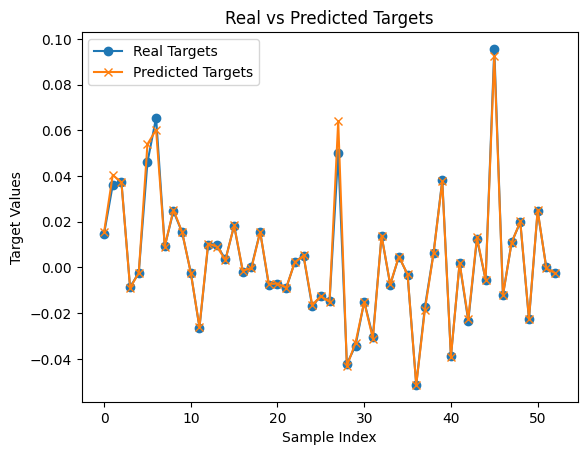

In [275]:
plt.plot(y_test, label='Real Targets', marker='o')
plt.plot(regressor_pred, label='Predicted Targets', marker='x')

# Add labels and a legend
plt.xlabel('Sample Index')
plt.ylabel('Target Values')
plt.title('Real vs Predicted Targets')
plt.legend()

# Show the plot
plt.show()

As we can see our predictions are very close to the real values. A way to improve this algorithm is perhaps to tune it better with the hyperparameters and find values that minimize the mae

#XGBOOST

In [269]:
pip install xgboost


In [270]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'max_depth': 3,
    'learning_rate': 0.1,
}

model = xgb.train(params, dtrain, num_boost_round=10)

y_pred = model.predict(dtest)

mae = mean_absolute_error(y_test, y_pred)
r_r2 = r2_score (y_test, y_test)
print(f"Mean Absolute Error: {mae}")
print(f"R2: {r_r2}")

Mean Absolute Error: 0.007325437745130936
R2: 1.0
